# Coding Exercise #0106

### 1. Transforming DataFrames:

In [15]:
import pandas as pd
import numpy as np
import os

In [16]:
# Go to the directory where the data file is located.                 # Please, replace the path with your own if you re using jupyter

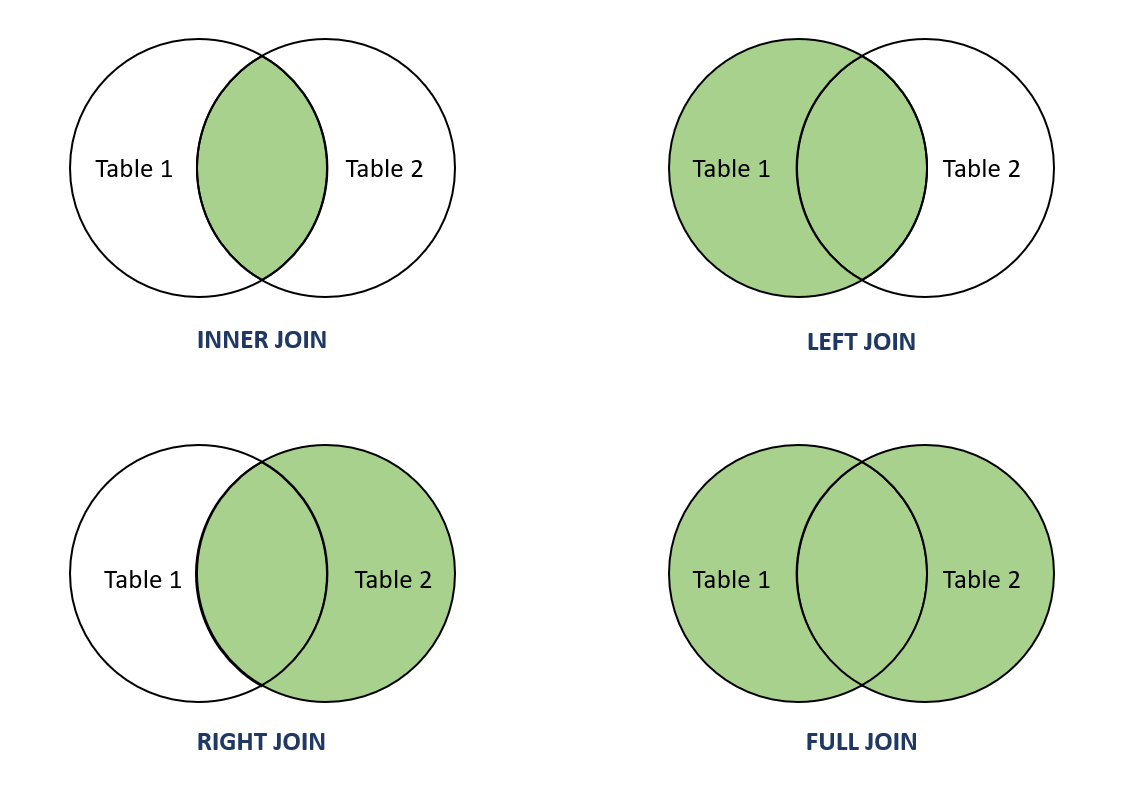

In [17]:
df = pd.read_csv('/content/drive/MyDrive/data_studentlist - data_studentlist.csv', header='infer')
#csv file sent earlier

In [18]:
# Replace the columns (header).
df.columns = ['NAME', 'GENDER' , 'AGE', 'GRADE', 'ABSENCE', 'BLOODTYPE', 'HEIGHT', 'WEIGHT']
df.head(3)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1


#### 1.1. Adding and removing columns:

In [19]:
df['BMI'] = 10000*df['WEIGHT']/df['HEIGHT']**2

In [20]:
df.head(5)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT,BMI
0,Jared Diamond,M,23,3,Y,O,165.3,68.2,24.959660
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0,18.317544
2,Brian Martin,M,24,4,N,B,175.0,80.1,26.155102
3,David Hassel,M,23,3,N,AB,182.1,85.7,25.844071
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5,17.538265


In [21]:
# drop() method removes a column. But it is just a 'view'.
df.drop('BMI',axis=1)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5
5,Jennifer Lorentz,F,21,2,N,O,162.0,52.0
6,Susan Clark,F,22,1,N,O,155.2,45.3
7,Margareth Jones,F,23,1,N,A,176.9,55.0
8,John Bertsch,M,23,3,N,B,178.5,64.2
9,Jake Timmerman,M,22,2,N,B,176.1,61.3


In [22]:
# The 'drop' was not permanent,
df.head(5)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT,BMI
0,Jared Diamond,M,23,3,Y,O,165.3,68.2,24.959660
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0,18.317544
2,Brian Martin,M,24,4,N,B,175.0,80.1,26.155102
3,David Hassel,M,23,3,N,AB,182.1,85.7,25.844071
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5,17.538265


In [23]:
# inplace=True makes the removal permanent.
df.drop('BMI',axis=1,inplace=True)
df.head(5)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


#### 1.2. Merging DataFrames:

* When data is divided into several places, it may be necessary to combine them into one or bind the data. In pandas, functions used to combine or bind DataFrames include **concat(), merge(), and join**

* pandas.concat(list of DataFrames)

* If the axial direction is not specified, *the default option axis=0* is applied and connected in the up/down row direction.


In [24]:
df_left = df.loc[:,['NAME','AGE','GENDER','GRADE','ABSENCE']]
df_left_small = df_left.loc[:10,]
df_left_small

,NAME,AGE,GENDER,GRADE,ABSENCE
0,Jared Diamond,23,M,3,Y
1,Sarah O'Donnel,22,F,2,N
2,Brian Martin,24,M,4,N
3,David Hassel,23,M,3,N
4,Clara Rodriquez,20,F,1,Y
5,Jennifer Lorentz,21,F,2,N
6,Susan Clark,22,F,1,N
7,Margareth Jones,23,F,1,N
8,John Bertsch,23,M,3,N
9,Jake Timmerman,22,M,2,N


In [25]:
df_right = df.loc[:,['NAME','BLOODTYPE','WEIGHT','HEIGHT']]
df_right_small = df_right.loc[7:,]
df_right_small

,NAME,BLOODTYPE,WEIGHT,HEIGHT
7,Margareth Jones,A,55.0,176.9
8,John Bertsch,B,64.2,178.5
9,Jake Timmerman,B,61.3,176.1
10,Joshua Connor,O,62.0,167.1
11,John Matsuda,AB,75.8,180.0
12,Eddy Johnson,A,55.3,162.2
13,Rebecah Anderson,O,53.1,176.1
14,Linda Carter,B,45.2,158.2
15,Richard Swayze,B,70.2,168.6
16,Andrew King,A,62.2,169.2


* The **on=None** option and the **how='inner’** options are applied as default values. The **on=None** option means merging all columns that belong in common to the two DataFrames into a reference (key). 

* The **how='inner’** option means that data in the reference column is extracted only when the data is an intersection common to both DataFrames.

* We merged and returned for five commonly existing stocks based on the column “id”.


Inner join:

In [26]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='inner')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Margareth Jones,23,F,1,N,A,55.0,176.9
1,John Bertsch,23,M,3,N,B,64.2,178.5
2,Jake Timmerman,22,M,2,N,B,61.3,176.1
3,Joshua Connor,24,M,4,Y,O,62.0,167.1


Left join:

If you use **how='left’**, ithe left DataFrame will be returned, and the right one will be treated as NaN.

In [27]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='left')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Jared Diamond,23,M,3,Y,NaN,NaN,NaN
1,Sarah O'Donnel,22,F,2,N,NaN,NaN,NaN
2,Brian Martin,24,M,4,N,NaN,NaN,NaN
3,David Hassel,23,M,3,N,NaN,NaN,NaN
4,Clara Rodriquez,20,F,1,Y,NaN,NaN,NaN
5,Jennifer Lorentz,21,F,2,N,NaN,NaN,NaN
6,Susan Clark,22,F,1,N,NaN,NaN,NaN
7,Margareth Jones,23,F,1,N,A,55.0,176.9
8,John Bertsch,23,M,3,N,B,64.2,178.5
9,Jake Timmerman,22,M,2,N,B,61.3,176.1


Right join:

If you use **how='right’**, ithe left DataFrame will be returned, and the right one will be treated as NaN.

In [28]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='right')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Margareth Jones,23.0,F,1.0,N,A,55.0,176.9
1,John Bertsch,23.0,M,3.0,N,B,64.2,178.5
2,Jake Timmerman,22.0,M,2.0,N,B,61.3,176.1
3,Joshua Connor,24.0,M,4.0,Y,O,62.0,167.1
4,John Matsuda,NaN,NaN,NaN,NaN,AB,75.8,180.0
5,Eddy Johnson,NaN,NaN,NaN,NaN,A,55.3,162.2
6,Rebecah Anderson,NaN,NaN,NaN,NaN,O,53.1,176.1
7,Linda Carter,NaN,NaN,NaN,NaN,B,45.2,158.2
8,Richard Swayze,NaN,NaN,NaN,NaN,B,70.2,168.6
9,Andrew King,NaN,NaN,NaN,NaN,A,62.2,169.2


Full outer join:

If you use **how=“outer”**, all the data on the left and right is returned.

In [29]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='outer')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Jared Diamond,23.0,M,3.0,Y,NaN,NaN,NaN
1,Sarah O'Donnel,22.0,F,2.0,N,NaN,NaN,NaN
2,Brian Martin,24.0,M,4.0,N,NaN,NaN,NaN
3,David Hassel,23.0,M,3.0,N,NaN,NaN,NaN
4,Clara Rodriquez,20.0,F,1.0,Y,NaN,NaN,NaN
5,Jennifer Lorentz,21.0,F,2.0,N,NaN,NaN,NaN
6,Susan Clark,22.0,F,1.0,N,NaN,NaN,NaN
7,Margareth Jones,23.0,F,1.0,N,A,55.0,176.9
8,John Bertsch,23.0,M,3.0,N,B,64.2,178.5
9,Jake Timmerman,22.0,M,2.0,N,B,61.3,176.1


#### 1.3. Binding DataFrames:

In the **concat()** function, seen earlier, is a concept that mergers the two DataFrames by a *certain criterion *in a manner similar to SQL’s join command. 
In this case, the column or index that is the reference is referred to as a key. The key must exist in both DataFrames.


Bind vertically matched by 'columns':

In [40]:


pd.concat([df_left_small,df_right_small],sort=True)  

,ABSENCE,AGE,BLOODTYPE,GENDER,GRADE,HEIGHT,NAME,WEIGHT
0,Y,23.0,NaN,M,3.0,NaN,Jared Diamond,NaN
1,N,22.0,NaN,F,2.0,NaN,Sarah O'Donnel,NaN
2,N,24.0,NaN,M,4.0,NaN,Brian Martin,NaN
3,N,23.0,NaN,M,3.0,NaN,David Hassel,NaN
4,Y,20.0,NaN,F,1.0,NaN,Clara Rodriquez,NaN
5,N,21.0,NaN,F,2.0,NaN,Jennifer Lorentz,NaN
6,N,22.0,NaN,F,1.0,NaN,Susan Clark,NaN
7,N,23.0,NaN,F,1.0,NaN,Margareth Jones,NaN
8,N,23.0,NaN,M,3.0,NaN,John Bertsch,NaN
9,N,22.0,NaN,M,2.0,NaN,Jake Timmerman,NaN


In [31]:
df_right_small

,NAME,BLOODTYPE,WEIGHT,HEIGHT
7,Margareth Jones,A,55.0,176.9
8,John Bertsch,B,64.2,178.5
9,Jake Timmerman,B,61.3,176.1
10,Joshua Connor,O,62.0,167.1
11,John Matsuda,AB,75.8,180.0
12,Eddy Johnson,A,55.3,162.2
13,Rebecah Anderson,O,53.1,176.1
14,Linda Carter,B,45.2,158.2
15,Richard Swayze,B,70.2,168.6
16,Andrew King,A,62.2,169.2


In [38]:
df_left_small

,NAME,AGE,GENDER,GRADE,ABSENCE
0,Jared Diamond,23,M,3,Y
1,Sarah O'Donnel,22,F,2,N
2,Brian Martin,24,M,4,N
3,David Hassel,23,M,3,N
4,Clara Rodriquez,20,F,1,Y
5,Jennifer Lorentz,21,F,2,N
6,Susan Clark,22,F,1,N
7,Margareth Jones,23,F,1,N
8,John Bertsch,23,M,3,N
9,Jake Timmerman,22,M,2,N


Bind horizontally matched by 'index':

In [41]:
pd.concat([df_left_small,df_right_small],axis=1,sort=True)         

,NAME,AGE,GENDER,GRADE,ABSENCE,NAME,BLOODTYPE,WEIGHT,HEIGHT
0,Jared Diamond,23.0,M,3.0,Y,NaN,NaN,NaN,NaN
1,Sarah O'Donnel,22.0,F,2.0,N,NaN,NaN,NaN,NaN
2,Brian Martin,24.0,M,4.0,N,NaN,NaN,NaN,NaN
3,David Hassel,23.0,M,3.0,N,NaN,NaN,NaN,NaN
4,Clara Rodriquez,20.0,F,1.0,Y,NaN,NaN,NaN,NaN
5,Jennifer Lorentz,21.0,F,2.0,N,NaN,NaN,NaN,NaN
6,Susan Clark,22.0,F,1.0,N,NaN,NaN,NaN,NaN
7,Margareth Jones,23.0,F,1.0,N,Margareth Jones,A,55.0,176.9
8,John Bertsch,23.0,M,3.0,N,John Bertsch,B,64.2,178.5
9,Jake Timmerman,22.0,M,2.0,N,Jake Timmerman,B,61.3,176.1


#### 1.4. DataFrames Sorting and multi Index:

It is possible to sort the rows of a DataFrame using one or more columns.

In [34]:
df.sort_values(by='AGE')

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5
16,Andrew King,M,21,1,N,A,169.2,62.2
5,Jennifer Lorentz,F,21,2,N,O,162.0,52.0
12,Eddy Johnson,M,21,1,N,A,162.2,55.3
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
14,Linda Carter,F,22,2,N,B,158.2,45.2
6,Susan Clark,F,22,1,N,O,155.2,45.3
11,John Matsuda,M,22,2,N,AB,180.0,75.8
9,Jake Timmerman,M,22,2,N,B,176.1,61.3
13,Rebecah Anderson,F,23,3,N,O,176.1,53.1


In [35]:
df.sort_values(by='AGE', ascending = False)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
2,Brian Martin,M,24,4,N,B,175.0,80.1
15,Richard Swayze,M,24,4,Y,B,168.6,70.2
10,Joshua Connor,M,24,4,Y,O,167.1,62.0
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
7,Margareth Jones,F,23,1,N,A,176.9,55.0
13,Rebecah Anderson,F,23,3,N,O,176.1,53.1
8,John Bertsch,M,23,3,N,B,178.5,64.2
3,David Hassel,M,23,3,N,AB,182.1,85.7
6,Susan Clark,F,22,1,N,O,155.2,45.3
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0


In [36]:
df.sort_values(by=['AGE', 'GRADE'])

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5
12,Eddy Johnson,M,21,1,N,A,162.2,55.3
16,Andrew King,M,21,1,N,A,169.2,62.2
5,Jennifer Lorentz,F,21,2,N,O,162.0,52.0
6,Susan Clark,F,22,1,N,O,155.2,45.3
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
9,Jake Timmerman,M,22,2,N,B,176.1,61.3
11,John Matsuda,M,22,2,N,AB,180.0,75.8
14,Linda Carter,F,22,2,N,B,158.2,45.2
7,Margareth Jones,F,23,1,N,A,176.9,55.0


Hierarchical indexing with MultiIndex:

* pandas supports hierarchical indexing through MultiIndex. 
* This example shows step by step how to create a MultiIndex object. 
* This object can be passed as value for the index argument when creating a DataFrame.

In [37]:
my_header = ['a', 'b', 'c']     #columns names
my_index_out = ['G1']*3 + ['G2']*3      #Labels for the outer layer.
my_index_in = [1, 2, 3]*2     #Labels for the innerr layer.
my_index_zipped = list(zip(my_index_out, my_index_in))      #Create a list of tuples with the labels.
my_index = pd.MultiIndex.from_tuples(my_index_zipped)     #Create the MultiIndex.
df = pd.DataFrame(data = np.random.randn(6, 3), index = my_index, columns = my_header) #Apply the MultiIndex.
df

a         b         c
G1 1  0.302662  0.123561 -0.003172
   2  0.894834 -0.951585 -0.108974
   3  0.724994 -0.928277  1.705519
G2 1  0.283709  0.674310 -1.158053
   2 -0.857885  1.932927 -1.043109
   3  0.018919 -0.018389  0.161178